# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [40]:
import pandas as pd

url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
penguins = pd.read_csv(url)

In [41]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [42]:
# Clean data
penguins["bill_depth_mm"].isna().value_counts()

,count
bill_depth_mm,
False,342
True,2


In [43]:
penguins["bill_length_mm"].isna().value_counts()

,count
bill_length_mm,
False,342
True,2


In [44]:
penguins_clean = penguins.dropna(subset=["bill_length_mm", "bill_depth_mm"]).copy()

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [45]:
# Target
y = penguins_clean["bill_depth_mm"]
# Feature
X = penguins_clean[["bill_length_mm"]]

In [46]:
# Simple Linear Regression
import sklearn
import numpy as np
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

slr_fit = slr.fit(X, y)

slr_pred = slr_fit.predict(X)

In [47]:
# Quadratic Model
penguins_clean["bill_length_mm_2"] = penguins_clean["bill_length_mm"]**2

X = penguins_clean[["bill_length_mm", "bill_length_mm_2"]]

lr = LinearRegression()

quad = lr.fit(X, y)

quad_pred = quad.predict(X)

In [48]:
# Cubic Model
penguins_clean["bill_length_mm_3"] = penguins_clean["bill_length_mm"]**3

X = penguins_clean[["bill_length_mm", "bill_length_mm_2", "bill_length_mm_3"]]

lr = LinearRegression()

cube = lr.fit(X, y)

cube_pred = cube.predict(X)

In [54]:
# Degree 10 Model
features = ["bill_length_mm", "bill_length_mm_2", "bill_length_mm_3"]

for i in range(4, 11):
  penguins_clean[f"bill_length_mm_{i}"] = penguins_clean["bill_length_mm"]**i
  features.append(f"bill_length_mm_{i}")

X = penguins_clean[features]

lr = LinearRegression()

ten = lr.fit(X, y)

ten_pred = ten.predict(X)

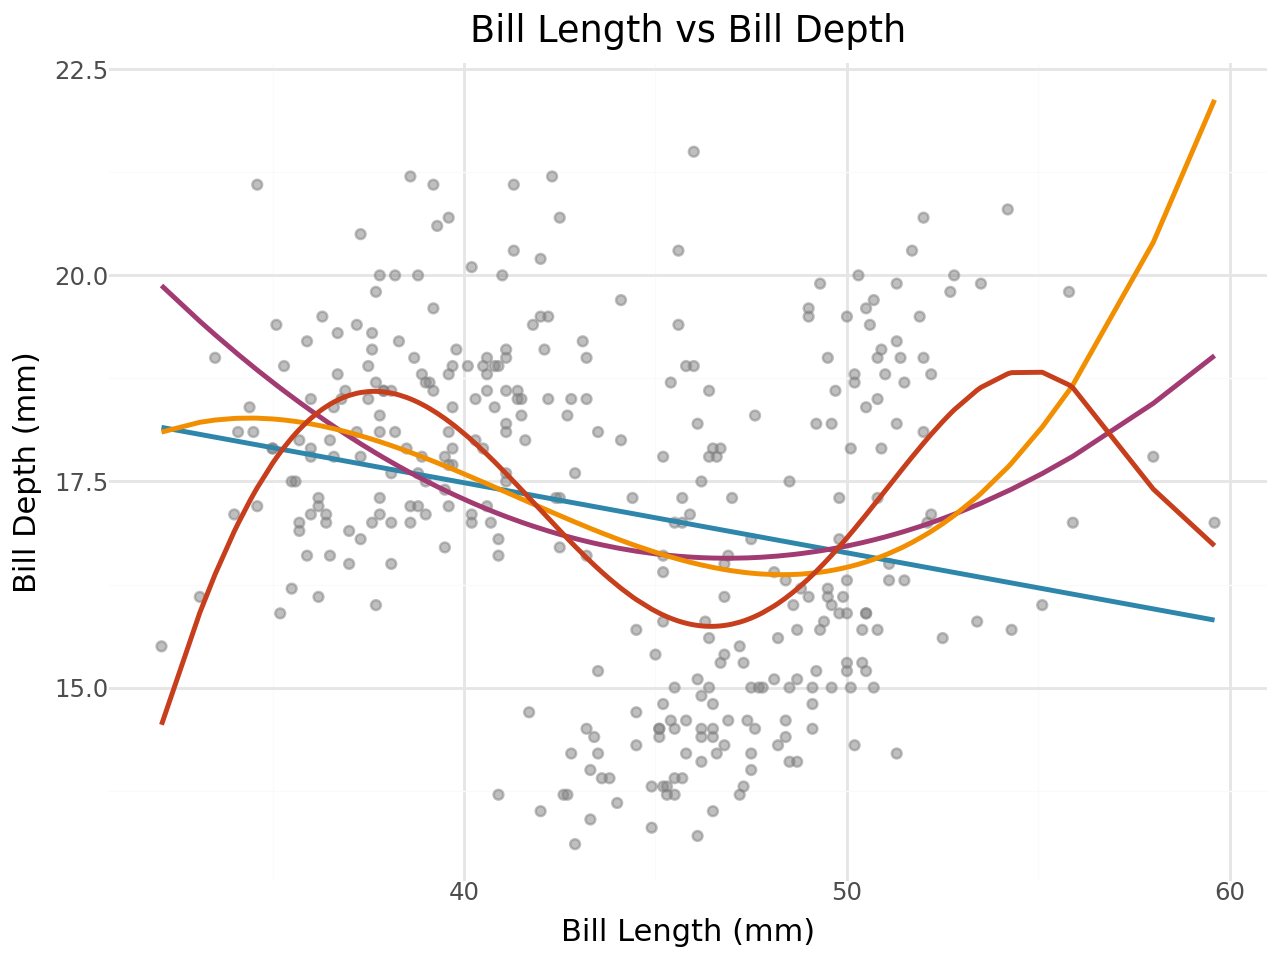

In [67]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal

plot = (
    ggplot(penguins_clean, aes(x='bill_length_mm', y='bill_depth_mm'))
    + geom_point(alpha=0.5, color='gray')
    + geom_line(aes(y='slr_pred'), color='#2E86AB', size=1)      # Blue - Linear
    + geom_line(aes(y='quad_pred'), color='#A23B72', size=1)     # Purple - Quadratic
    + geom_line(aes(y='cube_pred'), color='#F18F01', size=1)     # Orange - Cubic
    + geom_line(aes(y='ten_pred'), color='#C73E1D', size=1)      # Red - 10th degree
    + labs(
        title='Bill Length vs Bill Depth',
        x='Bill Length (mm)',
        y='Bill Depth (mm)'
    )
    + theme_minimal()
)
plot

* Are any of the models above underfitting the data? If so, which ones and how can you tell?

None of the models seem to be underfitting, all of the lines seem to generally capture the trends in the points.

* Are any of the models above overfitting the data? If so, which ones and how can you tell?

10th degree model seems to be overfitting, extreme behavior at the ends of the data, curvature that doesnt seem to fit any biological pattern, and would probably provide bad predictions for new penguins.

* Which of the above models do you think fits the data best and why?

Simpler models (linear, maybe quadratic) are actually doing the best job here!